# Libraries

In [1]:
#basic
import pandas as pd
import seaborn as sns
#plot
import matplotlib.pyplot as plt
import seaborn as sns

# Pipeline : imblearn
import imblearn
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE #SMOTE
# Pickle
import pickle

# Feature selection & Transformer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.compose import ColumnTransformer

# Preprocessing & Model
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('data/application_train.csv')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
train.value_counts().sum()

8602

In [5]:
train.isnull().sum() / len(train)

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

In [6]:
train.dropna(inplace=True)

# Preprocessing

In [7]:
# df_fill = train.drop(['SK_ID_CURR','CODE_GENDER', 'DAYS_BIRTH', 'FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',\
#                       'FLAG_CONT_MOBILE', 'FLAG_PHONE','CNT_CHILDREN','NAME_FAMILY_STATUS',\
#                       'FLAG_EMAIL','EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3',\
#                       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',\
#                       'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',\
#                       'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',\
#                       'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',\
#                       'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
#                      , axis=1)
# df_fill

In [8]:
# X = df_fill.drop('TARGET', axis=1)
# y = df_fill['TARGET']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

X = train.drop('TARGET', axis=1)
y = train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6451 entries, 53329 to 261666
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 6.0+ MB


In [10]:
categorials = list(X_train.select_dtypes('object').columns)
categorials

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [11]:
numericals = list(X_train.select_dtypes(exclude=['object']).columns)
numericals

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 

In [12]:
# ohe = OneHotEncoder(handle_unknown='ignore')
# ohe.fit(X_train[categorials])
# X_train_cat_encoded = ohe.transform(X_train[categorials])
# X_train_encoded_df = pd.DataFrame(X_train_cat_encoded.todense(), columns= ohe.get_feature_names(categorials))

# ss = StandardScaler()
# ss.fit(X_train[numericals])
# X_train_num_scaled = ss.transform(X_train[numericals])
# X_train_scaled_df = pd.DataFrame(X_train_num_scaled, columns=numericals)

# X_train_encoded_scaled = pd.concat([X_train_encoded_df, X_train_scaled_df], axis=1)
# X_train_encoded_scaled.head()

In [13]:
# X_train_encoded_scaled.dropna(inplace=True)

In [14]:
# # Random Forest Classifier with GrindSearchCV

# # model
# model_rf3 = RandomForestClassifier()

# # param grindsearchcv
# param_grid = {'n_estimators': [50, 100, 150],
#               'max_depth': [2, 6, 10]
#              }

# #gridsearch cv
# grid = GridSearchCV(model_rf3, param_grid=param_grid, cv=5, scoring='accuracy',verbose=3)

# #fit
# grid.fit(X_train, y_train)

# # score & best parameters
# print(grid.best_score_)
# print(grid.best_params_)

# Pipeline & Modeling

In [15]:
col_transformer = ColumnTransformer(transformers=[
                                                ('ohe', OneHotEncoder(handle_unknown="ignore"), categorials),
                                                ('scaler', StandardScaler(), numericals)
])

In [16]:
forest_pipeline = imbpipeline(steps=[
                        ("col_transformer", col_transformer),
                        ("balancing", SMOTE(random_state=20)),
                        ("model", RandomForestClassifier(max_depth= 2, n_estimators= 50, random_state=42))
])

In [17]:
forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY',
                                                   'NAME_TYPE_SUITE',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE',
                                                   'OCCUPATION_TYPE',
                                                   'WEEKDAY_APPR_PROCESS_START',
                              

In [18]:
results = cross_validate(forest_pipeline, X_train, y_train, return_train_score=True)

In [19]:
results

{'fit_time': array([0.76801419, 0.65497208, 0.62597299, 0.79397416, 0.76197314]),
 'score_time': array([0.03100634, 0.03500414, 0.03203154, 0.03600526, 0.03502917]),
 'test_score': array([0.76142525, 0.78682171, 0.79069767, 0.78449612, 0.75658915]),
 'train_score': array([0.77577519, 0.78821934, 0.7839566 , 0.78860686, 0.77891881])}

In [20]:
print(f'Average Train Score: {results["train_score"].mean()}')
print(f'Average Test Score: {results["test_score"].mean()}')

Average Train Score: 0.7830953604027823
Average Test Score: 0.7760059805811252


In [21]:
model = forest_pipeline
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)

# score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      2032
           1       0.11      0.36      0.16       119

    accuracy                           0.80      2151
   macro avg       0.53      0.59      0.52      2151
weighted avg       0.91      0.80      0.84      2151



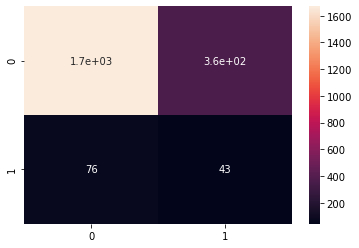

In [22]:
sns.heatmap(conf_matrix, annot=True)
plt.show()

## Pickle

In [23]:
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(forest_pipeline, file)